In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df_perinuclear = pd.read_csv('/Users/apple/Desktop/DATA_590/BRI_Capstone/PAM194_Keratino_CytoPanel_1/pam194ObjPerinuclear.csv', 
                            low_memory = False)

In [6]:
df_perinuclear.drop(['Metadata_Date', 'Metadata_FileLocation', 'Metadata_Run' , 'FileName_Actin',
                    'FileName_DNA', 'FileName_DNA2' , 'FileName_Golgi', 'FileName_Mito', 'FileName_NileRed', 
                    'FileName_WGA', 'PathName_Actin', 'PathName_DNA', 'PathName_DNA2', 'PathName_Golgi',
                     'PathName_Mito', 'PathName_NileRed', 'PathName_WGA', 'Metadata_Frame', 
                    'ObjectNumber', 'Metadata_Series'], axis =1, inplace = True)

In [7]:
df_perinuclear.head()

,ImageNumber,Metadata_Metadata_Cytokine,Metadata_Metadata_Dose,Metadata_Plate,Metadata_Well,Granularity_1_CorrActin,Granularity_1_CorrDNA2,Granularity_1_CorrGolgi,Granularity_1_CorrMito,Granularity_1_CorrNileRed,Granularity_1_CorrWGA,Granularity_2_CorrActin,Granularity_2_CorrDNA2,Granularity_2_CorrGolgi,Granularity_2_CorrMito,Granularity_2_CorrNileRed,Granularity_2_CorrWGA,Granularity_3_CorrActin,Granularity_3_CorrDNA2,Granularity_3_CorrGolgi,Granularity_3_CorrMito,Granularity_3_CorrNileRed,Granularity_3_CorrWGA,Granularity_4_CorrActin,Granularity_4_CorrDNA2,Granularity_4_CorrGolgi,Granularity_4_CorrMito,Granularity_4_CorrNileRed,Granularity_4_CorrWGA,Intensity_MedianIntensity_CorrActin,Intensity_MedianIntensity_CorrDNA2,Intensity_MedianIntensity_CorrGolgi,Intensity_MedianIntensity_CorrMito,Intensity_MedianIntensity_CorrNileRed,Intensity_MedianIntensity_CorrWGA,RadialDistribution_MeanFrac_CorrActin_1of3,RadialDistribution_MeanFrac_CorrActin_2of3,RadialDistribution_MeanFrac_CorrActin_3of3,RadialDistribution_MeanFrac_CorrDNA2_1of3,RadialDistribution_MeanFrac_CorrDNA2_2of3,RadialDistribution_MeanFrac_CorrDNA2_3of3,RadialDistribution_MeanFrac_CorrGolgi_1of3,RadialDistribution_MeanFrac_CorrGolgi_2of3,RadialDistribution_MeanFrac_CorrGolgi_3of3,RadialDistribution_MeanFrac_CorrMito_1of3,RadialDistribution_MeanFrac_CorrMito_2of3,RadialDistribution_MeanFrac_CorrMito_3of3,RadialDistribution_MeanFrac_CorrNileRed_1of3,RadialDistribution_MeanFrac_CorrNileRed_2of3,RadialDistribution_MeanFrac_CorrNileRed_3of3,RadialDistribution_MeanFrac_CorrWGA_1of3,RadialDistribution_MeanFrac_CorrWGA_2of3,RadialDistribution_MeanFrac_CorrWGA_3of3,Texture_AngularSecondMoment_CorrActin_3_00_256,Texture_AngularSecondMoment_CorrActin_3_01_256,Texture_AngularSecondMoment_CorrActin_3_02_256,Texture_AngularSecondMoment_CorrActin_3_03_256,Texture_AngularSecondMoment_CorrDNA2_3_00_256,Texture_AngularSecondMoment_CorrDNA2_3_01_256,Texture_AngularSecondMoment_CorrDNA2_3_02_256,Texture_AngularSecondMoment_CorrDNA2_3_03_256,Texture_AngularSecondMoment_CorrGolgi_3_00_256,Texture_AngularSecondMoment_CorrGolgi_3_01_256,Texture_AngularSecondMoment_CorrGolgi_3_02_256,Texture_AngularSecondMoment_CorrGolgi_3_03_256,Texture_AngularSecondMoment_CorrMito_3_00_256,Texture_AngularSecondMoment_CorrMito_3_01_256,Texture_AngularSecondMoment_CorrMito_3_02_256,Texture_AngularSecondMoment_CorrMito_3_03_256,Texture_AngularSecondMoment_CorrNileRed_3_00_256,Texture_AngularSecondMoment_CorrNileRed_3_01_256,Texture_AngularSecondMoment_CorrNileRed_3_02_256,Texture_AngularSecondMoment_CorrNileRed_3_03_256,Texture_AngularSecondMoment_CorrWGA_3_00_256,Texture_AngularSecondMoment_CorrWGA_3_01_256,Texture_AngularSecondMoment_CorrWGA_3_02_256,Texture_AngularSecondMoment_CorrWGA_3_03_256,Texture_Contrast_CorrActin_3_00_256,Texture_Contrast_CorrActin_3_01_256,Texture_Contrast_CorrActin_3_02_256,Texture_Contrast_CorrActin_3_03_256,Texture_Contrast_CorrDNA2_3_00_256,Texture_Contrast_CorrDNA2_3_01_256,Texture_Contrast_CorrDNA2_3_02_256,Texture_Contrast_CorrDNA2_3_03_256,Texture_Contrast_CorrGolgi_3_00_256,Texture_Contrast_CorrGolgi_3_01_256,Texture_Contrast_CorrGolgi_3_02_256,Texture_Contrast_CorrGolgi_3_03_256,Texture_Contrast_CorrMito_3_00_256,Texture_Contrast_CorrMito_3_01_256,Texture_Contrast_CorrMito_3_02_256,Texture_Contrast_CorrMito_3_03_256,Texture_Contrast_CorrNileRed_3_00_256,Texture_Contrast_CorrNileRed_3_01_256,Texture_Contrast_CorrNileRed_3_02_256,Texture_Contrast_CorrNileRed_3_03_256,Texture_Contrast_CorrWGA_3_00_256,Texture_Contrast_CorrWGA_3_01_256,Texture_Contrast_CorrWGA_3_02_256,Texture_Contrast_CorrWGA_3_03_256
0,1,IFNg,33,Plate 1,B10,39.085821,65.349797,29.429464,30.085395,44.114031,22.509906,0.003287,26.423181,0.268834,5.465537,0.736727,0.000000,0.000000,4.980042,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.317331,0.007016,0.040251,0.144508,0.031376,0.098350,0.124451,0.096431,0.112103,0.857166,1.034554,1.005375,5.600852,0.898213,0.225210,1.036650,1.179655,0.886456

In [8]:
target_values = df_perinuclear[['Metadata_Metadata_Cytokine', 'Metadata_Metadata_Dose']]

In [21]:
df_perinuclear_updated = df_perinuclear.drop(['ImageNumber', 'Metadata_Metadata_Cytokine', 
                                             'Metadata_Metadata_Dose', 'Metadata_Plate', 'Metadata_Well'], axis =1)

In [22]:
df_perinuclear_updated.dropna(inplace = True)

In [23]:
#Scale the data 
scaler = MinMaxScaler()

# Apply Min-Max scaling to selected columns
df_perinuclear_scaled = scaler.fit_transform(df_perinuclear_updated)

#df_perinuclear_updated.head()

In [33]:
pca = PCA(n_components = 10)
# Fit PCA on the standardized data
principal_components = pca.fit_transform(df_perinuclear_scaled)

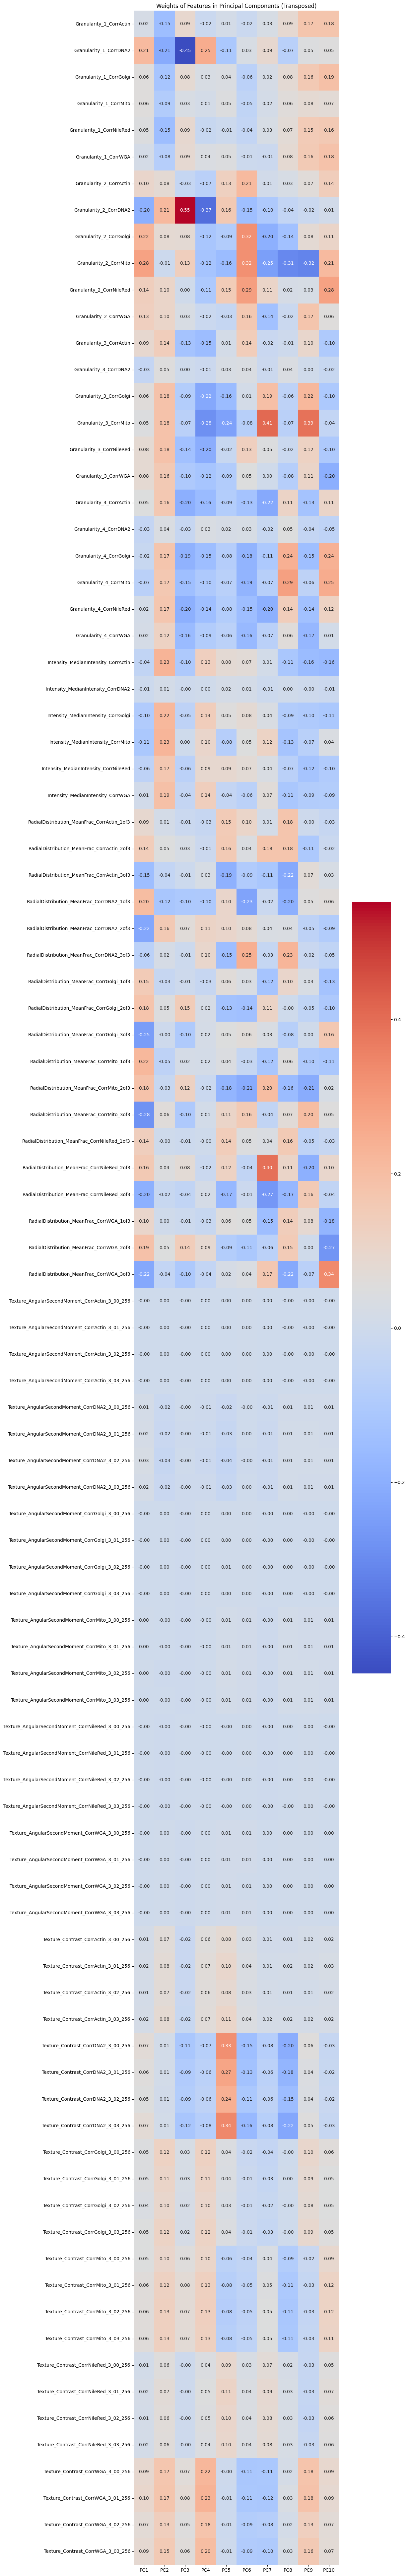

In [37]:
# Create a DataFrame with the weights
weights_df = pd.DataFrame(pca.components_, columns=df_perinuclear_updated.columns)

# Transpose the DataFrame
weights_df_transposed = weights_df.T

# Create a transposed heatmap of the weights
plt.figure(figsize=(10, 100))
sns.heatmap(weights_df_transposed, annot=True, cmap='coolwarm', fmt=".2f", 
            xticklabels=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10"], 
            yticklabels=df_perinuclear_updated.columns)
plt.title("Weights of Features in Principal Components (Transposed)")
plt.show()

In [35]:
# Get the variance explained by each principal component
variance_explained = pca.explained_variance_ratio_

# Cumulative variance explained
cumulative_variance_explained = np.cumsum(variance_explained)

# Display the results
for i, (variance, cumulative_variance) in enumerate(zip(variance_explained, cumulative_variance_explained), 1):
    print(f"Principal Component {i}: Variance Explained = {variance:.4f}, Cumulative Variance Explained = {cumulative_variance:.4f}")


Principal Component 1: Variance Explained = 0.2859, Cumulative Variance Explained = 0.2859
Principal Component 2: Variance Explained = 0.1534, Cumulative Variance Explained = 0.4392
Principal Component 3: Variance Explained = 0.0762, Cumulative Variance Explained = 0.5154
Principal Component 4: Variance Explained = 0.0643, Cumulative Variance Explained = 0.5798
Principal Component 5: Variance Explained = 0.0497, Cumulative Variance Explained = 0.6295
Principal Component 6: Variance Explained = 0.0344, Cumulative Variance Explained = 0.6639
Principal Component 7: Variance Explained = 0.0278, Cumulative Variance Explained = 0.6917
Principal Component 8: Variance Explained = 0.0263, Cumulative Variance Explained = 0.7181
Principal Component 9: Variance Explained = 0.0254, Cumulative Variance Explained = 0.7434
Principal Component 10: Variance Explained = 0.0182, Cumulative Variance Explained = 0.7616


In [1]:
from typing import Optional, Union

In [124]:
def principal_component_analysis(data, number_of_components = 10, 
                                 columns_to_drop: Optional[list] = None, number_of_column: Optional[int] = None, 
                                 columns_to_keep: Optional[list] = None):
    
    '''
    The function performs principal component analysis on the provided dataset. It can take inputs for columns of 
    interest in various forms
    
    Inputs: 
    1. data: type(DataFrame), The main dataframe on which PCA has to be performed 
    2. number_of_components: type(int), This is the number of components which will be used for doing PCA
    Note: 
    For the below three inputs only providing 1 is sufficient 
    3. columns_to_drop: type(list), provide the name of all columns to be dropped in a list 
    4. number_of_column: type(int), this is the number of column including and after which we want to keep all 
    variables for PCA. 
    5. columns_to_keep: type(list), provide the name of all columns to keep in a list  
    
    '''
    
    if columns_to_drop is not None: 
        relevant_dataset = data.drop(columns_to_drop, axis = 1)
    elif number_of_column is not None: 
        all_columns = data.columns
        relevant_columns = all_columns[number_of_column:]
        relevant_dataset = data[relevant_columns]
    elif columns_to_keep is not None: 
        relevant_dataset = data[columns_to_keep]
    else:
        raise ValueError("One of 'columns_to_drop', 'number_of_column', or 'columns_to_keep' must be provided.")
        
        
    # Data Cleaning for now won't be needed afterwards
    relevant_dataset.dropna(inplace = True)
    
    
    #Scale the input variables 
    
    #Scale the data 
    scaler = MinMaxScaler()

    # Apply Min-Max scaling to selected columns
    relevant_dataset_scaled = scaler.fit_transform(relevant_dataset[]) 
    temp = relevant_dataset_scaled
    
    #Perform PCA 
    
    # Perform PCA on the scaled dataset
    pca = PCA(n_components = number_of_components)
    # Fit PCA on the standardized data
    principal_components = pca.fit_transform(relevant_dataset_scaled)
    
    return pca, relevant_columns, temp 

In [125]:
pca, columns, temp = principal_component_analysis(df_perinuclear,number_of_column = 5)

In [131]:
temp[:,1].max()

1.0

In [134]:
def view_principal_components(pca_object, columns_used_for_pca, number_of_components):
    
    weights_df = pd.DataFrame(pca_object.components_,columns=columns_used_for_pca)
    weights_df_transposed = weights_df.T
    weights_df_transposed['sum_of_abs_weights'] = weights_df_transposed.abs().sum(axis=1)
    
    weights_df_transposed.sort_values(by='sum_of_abs_weights', ascending=False, inplace = True)
    xlabels = [f'PC{i}' for i in range(1,number_of_components+1)] 
    xlabels.append('TC')
    
    # Create a transposed heatmap of the weights
    plt.figure(figsize=(10, 100))
    sns.heatmap(weights_df_transposed, annot=True, cmap='coolwarm', fmt=".2f", 
                xticklabels=xlabels, 
                yticklabels=weights_df_transposed.reset_index()['index'].values)
    plt.title("Weights of Features in Principal Components (Transposed)")
    fig = plt.gcf()
    return fig, weights_df_transposed
    
    
    

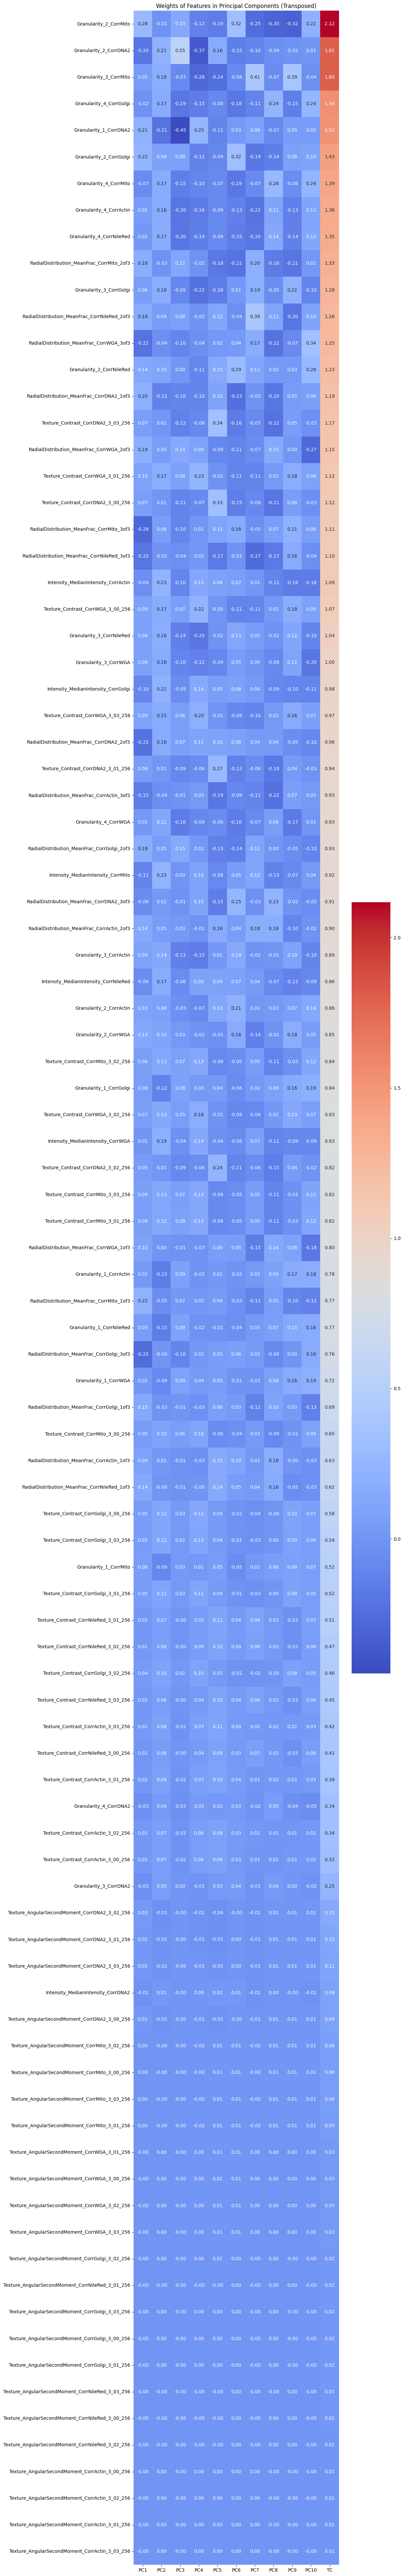

In [135]:
figure, weights_df_T = view_principal_components(pca,columns, number_of_components = 10)

In [138]:
def get_features_below_threshold(dataframe, threshold):
    # Drop features below the threshold
    filtered_dataframe = dataframe[dataframe['sum_of_abs_weights'] >= threshold].reset_index()

    return filtered_dataframe['index'].values


In [139]:
# Example usage:
threshold_value = 0.1
filtered_weights_df = get_features_below_threshold(weights_df_T, threshold_value)

# Display the filtered DataFrame
print(filtered_weights_df)

['Granularity_2_CorrMito' 'Granularity_2_CorrDNA2'
 'Granularity_3_CorrMito' 'Granularity_4_CorrGolgi'
 'Granularity_1_CorrDNA2' 'Granularity_2_CorrGolgi'
 'Granularity_4_CorrMito' 'Granularity_4_CorrActin'
 'Granularity_4_CorrNileRed' 'RadialDistribution_MeanFrac_CorrMito_2of3'
 'Granularity_3_CorrGolgi' 'RadialDistribution_MeanFrac_CorrNileRed_2of3'
 'RadialDistribution_MeanFrac_CorrWGA_3of3' 'Granularity_2_CorrNileRed'
 'RadialDistribution_MeanFrac_CorrDNA2_1of3'
 'Texture_Contrast_CorrDNA2_3_03_256'
 'RadialDistribution_MeanFrac_CorrWGA_2of3'
 'Texture_Contrast_CorrWGA_3_01_256' 'Texture_Contrast_CorrDNA2_3_00_256'
 'RadialDistribution_MeanFrac_CorrMito_3of3'
 'RadialDistribution_MeanFrac_CorrNileRed_3of3'
 'Intensity_MedianIntensity_CorrActin' 'Texture_Contrast_CorrWGA_3_00_256'
 'Granularity_3_CorrNileRed' 'Granularity_3_CorrWGA'
 'Intensity_MedianIntensity_CorrGolgi' 'Texture_Contrast_CorrWGA_3_03_256'
 'RadialDistribution_MeanFrac_CorrDNA2_2of3'
 'Texture_Contrast_CorrDNA2_3_01

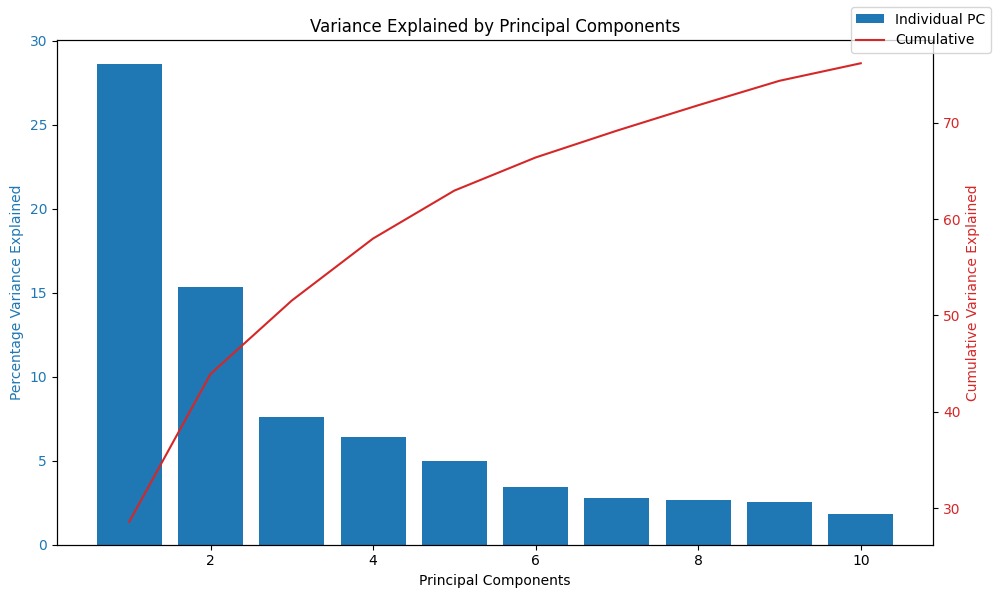

In [140]:
def plot_variance_explained(pca_object, title="Variance Explained by Principal Components"):
    # Get the percentage of variance explained by each principal component
    variance_explained_ratio = pca_object.explained_variance_ratio_

    # Calculate the cumulative variance explained
    cumulative_variance_explained = variance_explained_ratio.cumsum()

    # Plot both bar chart and line chart on the same graph
    fig, ax1 = plt.subplots(figsize=(10, 6))

    color = 'tab:blue'
    ax1.set_xlabel('Principal Components')
    ax1.set_ylabel('Percentage Variance Explained', color=color)
    
    # Plot bar chart for percentage variance explained by each PC
    ax1.bar(range(1, len(variance_explained_ratio) + 1), variance_explained_ratio * 100, color=color, label='Individual PC')
    ax1.tick_params(axis='y', labelcolor=color)
    
    # Create a second y-axis for cumulative variance explained
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Cumulative Variance Explained', color=color)
    
    # Plot line chart for cumulative variance explained
    ax2.plot(range(1, len(cumulative_variance_explained) + 1), cumulative_variance_explained * 100, color=color, label='Cumulative')
    ax2.tick_params(axis='y', labelcolor=color)

    # Set titles and legends
    plt.title(title)
    fig.tight_layout()
    fig.legend(loc='upper right')
    
    # Show the plot
    plt.show()

# Example usage:
# Assuming principal_components is the output from your PCA function
plot_variance_explained(pca)
